In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option("display.max_rows",15)   
pd.set_option("display.max_columns",15)  

### 问题

+ 哪些电影最受人关注?
+ 哪些电影评分更高?
+ 电影的评分和年龄,性别有关吗?

# load data

本案例参考参考Gred Reda的分析

http://grouplens.org/datasets/movielens/


评分表  
196	242	3	881250949  
186	302	3	891717742  
22	377	1	878887116  
244	51	2	880606923  
166	346	1	886397596  
298	474	4	884182806  
115	265	2	881171488  
253	465	5	891628467  
305	451	3	886324817  


用户信息表  
1|24|M|technician|85711  
2|53|F|other|94043  
3|23|M|writer|32067  
4|24|M|technician|43537  
5|33|F|other|15213  

电影表  
1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0  
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0  
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0  
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0   
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0  


In [36]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../data/ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# merge
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [37]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [38]:
lens.shape

(100000, 12)

In [39]:
lens[['age','rating']].describe()

,age,rating
count,100000.000000,100000.000000
mean,32.969850,3.529860
std,11.562623,1.125674
min,7.000000,1.000000
25%,24.000000,3.000000
50%,30.000000,4.000000
75%,40.000000,4.000000
max,73.000000,5.000000


In [9]:
lens['sex'].value_counts()

M    74260
F    25740
Name: sex, dtype: int64

In [10]:
total_null=lens.isnull().sum()
print(total_null)

movie_id                   0
title                      0
release_date               9
video_release_date    100000
imdb_url                  13
user_id                    0
rating                     0
unix_timestamp             0
age                        0
sex                        0
occupation                 0
zip_code                   0
dtype: int64


# 评分最多的电影?

In [40]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:20]
most_rated

title
Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
                                   ... 
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
dtype: int64

In [12]:
# value_counts
lens.title.value_counts()[:20]

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
                                   ... 
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

# 评分最高的

In [41]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head(10)

rating          
                                              size      mean
title                                                       
'Til There Was You (1997)                        9  2.333333
1-900 (1994)                                     5  2.600000
101 Dalmatians (1996)                          109  2.908257
12 Angry Men (1957)                            125  4.344000
187 (1997)                                      41  3.024390
2 Days in the Valley (1996)                     93  3.225806
20,000 Leagues Under the Sea (1954)             72  3.500000
2001: A Space Odyssey (1968)                   259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)      5  1.000000
39 Steps, The (1935)                            59  4.050847

In [42]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False).head(10)

rating     
                                                    size mean
title                                                        
They Made Me a Criminal (1939)                         1  5.0
Marlene Dietrich: Shadow and Light (1996)              1  5.0
Saint of Fort Washington, The (1993)                   2  5.0
Someone Else's America (1995)                          1  5.0
Star Kid (1997)                                        3  5.0
Great Day in Harlem, A (1994)                          1  5.0
Aiqing wansui (1994)                                   1  5.0
Santa with Muscles (1996)                              2  5.0
Prefontaine (1997)                                     3  5.0
Entertaining Angels: The Dorothy Day Story (1996)      1  5.0

只有1人评分的似乎不应该考虑

In [15]:
#列是二维索引
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

# 分析评分人数最多的百部电影

In [43]:
most_100 = lens.groupby('movie_id').size().sort_values(ascending=False)[:100]
most_100

movie_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
      ... 
161    220
71     220
8      219
95     219
427    219
678    219
322    218
dtype: int64

# 评分与年龄有关吗?

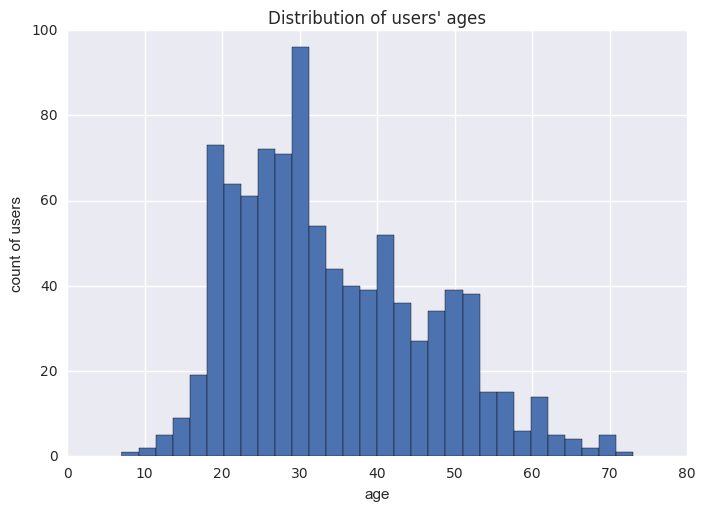

In [44]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [45]:
import seaborn as sns

C:\Anaconda\envs\py35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


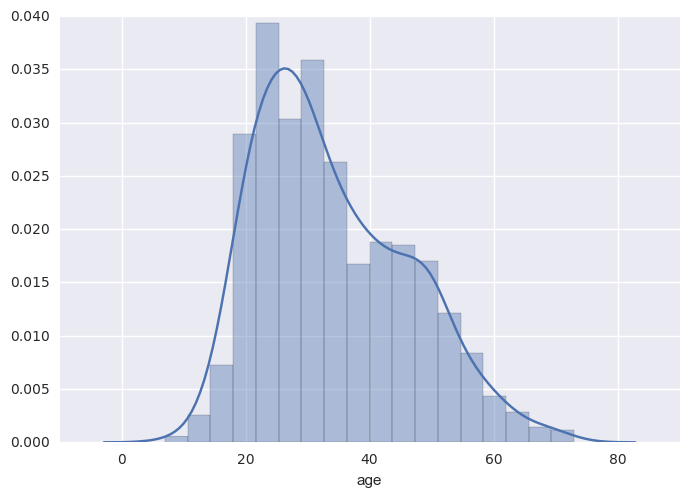

In [19]:
sns.distplot(users.age)

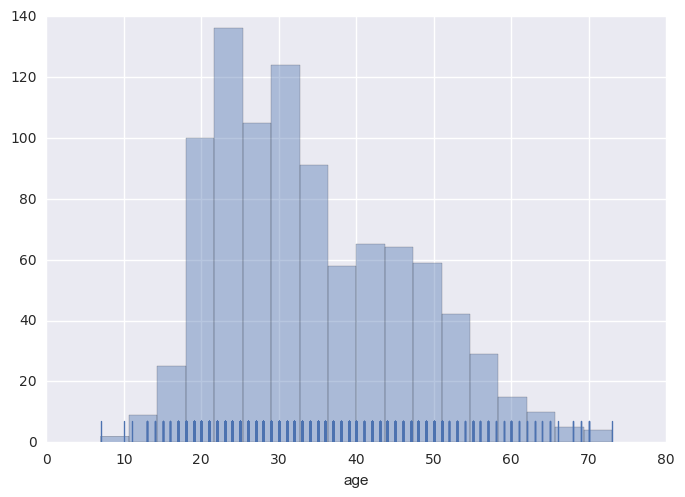

In [20]:
sns.distplot(users.age, kde=False, rug=True)

In [21]:
users.age.min(),users.age.max()

(7, 73)

In [46]:
np.arange(0, 81, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [47]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, np.arange(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [49]:
lens.tail()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
99995,748,"Saint, The (1997)",14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,729,4,893286638,19,M,student,56567,10-19
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,729,3,893286338,19,M,student,56567,10-19
99997,879,"Peacemaker, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Peacemaker%2C...,729,3,893286299,19,M,student,56567,10-19
99998,894,Home Alone 3 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,729,1,893286511,19,M,student,56567,10-19
99999,901,Mr. Magoo (1997),25-Dec-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,729,1,893286491,19,M,student,56567,10-19


In [23]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [50]:
lens.set_index('movie_id', inplace=True)

In [51]:
lens.head()

,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
movie_id,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


In [25]:
by_age = lens.loc[most_100.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                         age_group
2001: A Space Odyssey (1968)  0-9          5.000000
                              10-19        4.100000
                              20-29        3.924731
                              30-39        3.887500
                              40-49        4.093023
                              50-59        4.000000
                              60-69        4.285714
Air Force One (1997)          10-19        3.647059
                              20-29        3.666667
                              30-39        3.570000
                              40-49        3.555556
                              50-59        3.750000
                              60-69        3.666667
                              70-79        3.666667
Aladdin (1992)                10-19        3.840000
Name: rating, dtype: float64

In [27]:
by_age.rating.mean().unstack(1).fillna(0)[0:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
2001: A Space Odyssey (1968),5.0,4.100000,3.924731,3.887500,4.093023,4.000000,4.285714,0.000000
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Aladdin (1992),0.0,3.840000,3.820000,3.847458,3.769231,3.571429,3.500000,0.000000
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
Amadeus (1984),0.0,4.250000,4.067308,4.236842,4.081633,4.230769,4.750000,5.000000
Apocalypse Now (1979),0.0,4.400000,4.050633,4.132353,3.700000,4.187500,4.142857,5.000000
...,...,...,...,...,...,...,...,...
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.000000


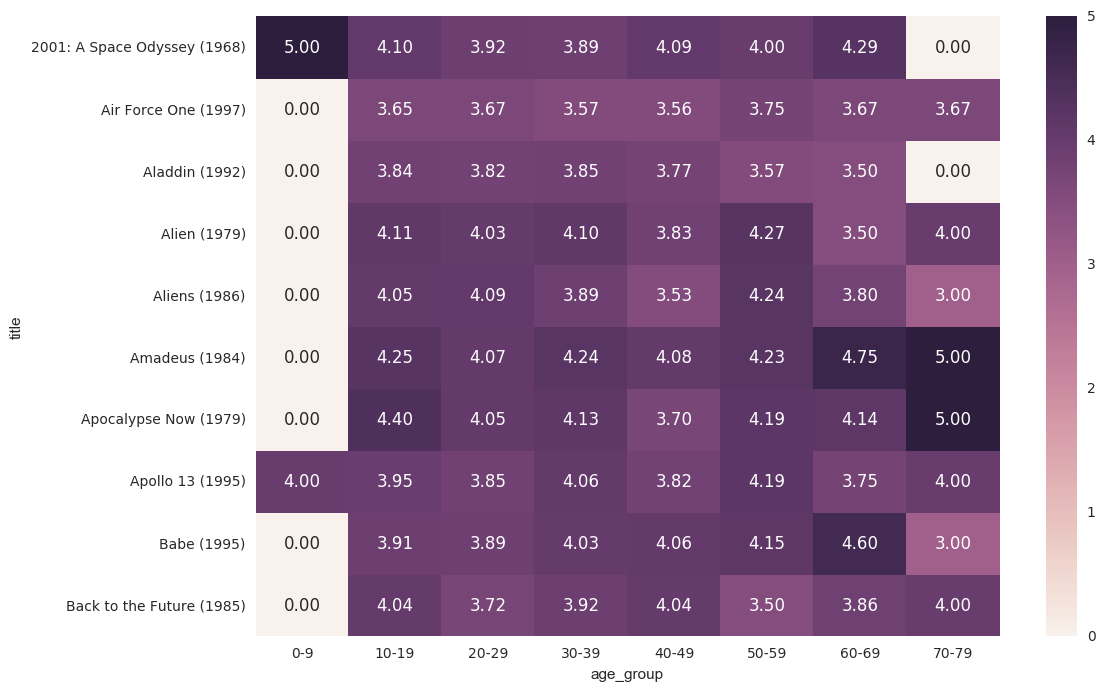

In [28]:
with sns.axes_style('white'):
    plt.figure(figsize=(12, 8))
    sns.heatmap(by_age.rating.mean().unstack(1).fillna(0)[0:10], annot=True,fmt='4.2f');

# 评分与性别有关吗?

In [53]:
lens.reset_index('movie_id', inplace=True)

In [54]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


In [55]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [56]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [57]:
pivoted.reset_index('movie_id', inplace=True)

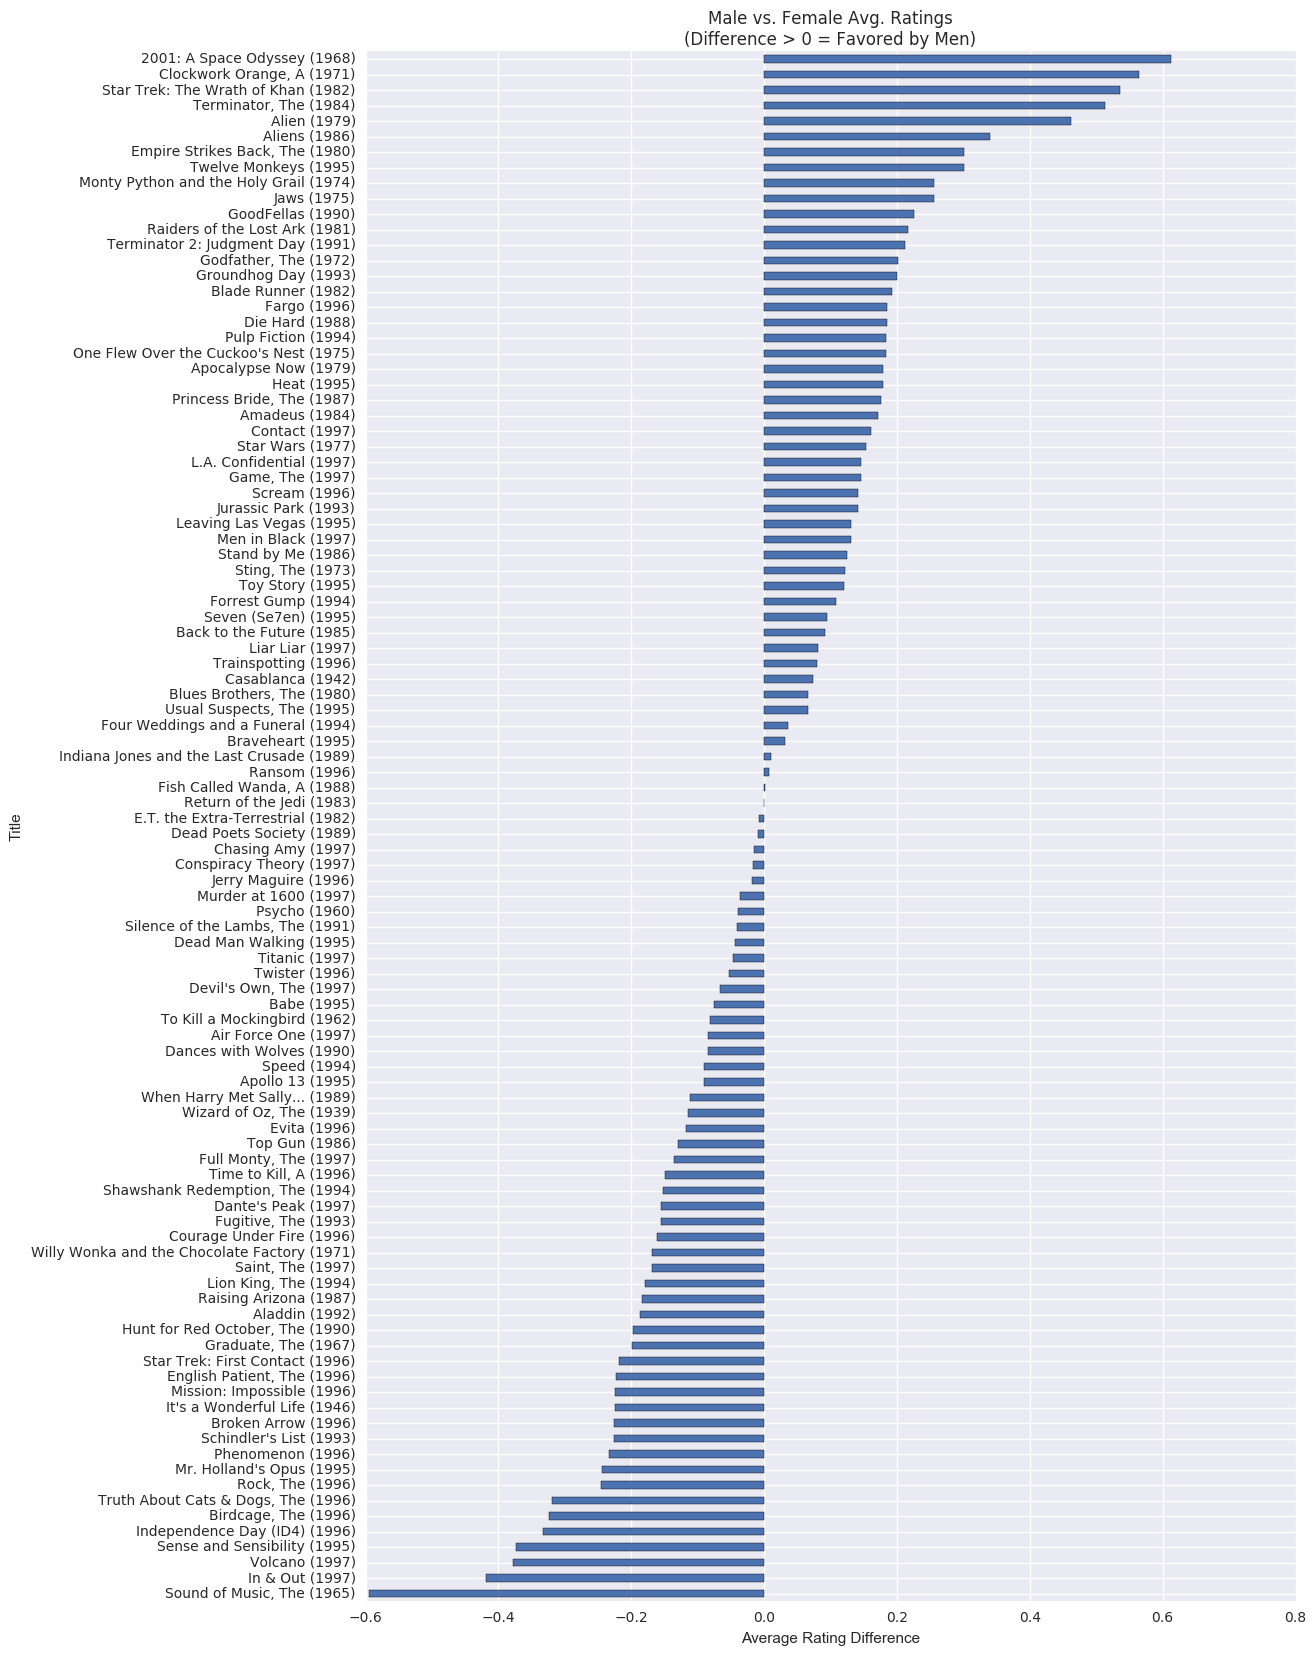

In [58]:
disagreements = pivoted[pivoted.movie_id.isin(most_100.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[12, 20])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');